---

Resumo: Limpando e estruturando os dados disponibilizados pelo município do Rio de Janeiro através do data.rio.

---

A prefeitura do Rio de Janeiro disponibiliza uma vasta quantidade de dados em seu portal de transparência de dados, [data.rio](http://www.data.rio/). Muitas dessas bases de dados, principalmente as relacionadas a economia fluminense, são disponibilizadas seguindo as divisões de Áreas de Planejamento (AP), Regiões de Planejamento (RP), Regiões Admininistrativas (RA) e Bairros. Apesar de estarem em formato de planilha (xls), os dados são dividios em diferentes abas, uma para cada ano, e em uma estrutura que não permite análises básicas como evolução de série histórica. 



A base de dado que vamos usar pode ser encontra aqui -> [Número de empregados por atividade econômica segundo as Áreas de Planejamento (AP), Regiões Administrativas (RA) e Bairros](http://www.data.rio/datasets/n%C3%BAmero-de-empregados-por-atividade-econ%C3%B4mica-segundo-as-%C3%A1reas-de-planejamento-ap-regi%C3%B5es-administrativas-ra-e-bairros-no-munic%C3%ADpio-do-rio-de-janeiro-em-2005-2018) 

Esses dados me chamaram atenção para entender melhor a regionalização econõmica da cidade. 

Podemos notar que a estrutura é bastante poluída, com linhas sem relevância para análises, com a divisória horizontal entre APs, RPs, RAs e bairro e com os anos separados em abas. Com isso, precisamos limpar os dados e transformá-los em uma estrutura onde seja possível realizar análises estatísticas.  

![title](/home/blackmamba/data_analysis/atividades_econ_rio/data-xls.png)



### Limpando somente uma aba / ano

Primeiro, vamos limpar somente um aba, o ano de 2005, para depois aplicar os mesmo procedimentos em todas as outras. 

Essa primeira etapa demandou um pequeno trabalho manual de contar as linhas que e colunas que desejava manter e quais deseja excluir. Como todos os dados disponibilizados nessa divisão regionaliza apresentam esse mesmo padrão, pelo menos foi um trabalho de uma vez só, podendo ser aplicado em outras bases. 

In [4]:
#import pandas
import pandas as pd

#select files
file_path_empregados =  "raw_data/atividades_econ_rj_ap.xls"

#trying cleaning for one 2005 sheet
dataframe_2005 = pd.read_excel(file_path_empregados, sheet_name="2005", header=3,  nrows=224, usecols="A:Z")

#delete uncessary rows
dataframe_2005.drop([0, 1, 2, 3, 4, 5, 10, 12, 17, 22, 24, 26, 27, 28, 29, 38, 41, 49, 51, 52, 56, 61, 62, 63, 64,
        69, 71, 72, 89, 91, 92, 99, 113, 114, 121, 123, 124, 128, 133, 134, 139, 146, 147, 163, 164, 165, 
         166, 177, 179, 180, 189, 190, 191, 192, 197, 204, 205, 211, 212, 216, 217, 221], inplace=True)

Agora já temos os dados estruturados por bairros e todas as diversas atividades econômicas. 

In [5]:
dataframe_2005.head()

,Bairros,Extrativa mineral,Minerais não-metálicos,Indústria metalúrgica,Indústria mecânica,Indústria do material elétrico e de comunicações,Indústria de material de transporte,Indústria da madeira e do mobiliário,"Indústria do papel, papelão, editorial e gráfica","Indústria da borracha, fumo, couros, peles, similares e diversas",...,Comércio varejista,Comércio atacadista,"Instituições de crédito, seguros e capitalização","Comércio e administração de imóveis, valores mobiliários, serviços técnicos",Transportes e comunicações,"Serviços de alojamento, alimentação, reparação, manutenção, redação...","Serviços médicos, odontológicos e veterinários",Ensino,Administração pública direta e autárquica,"Agricultura, silvicultura, criação de animais, extrativismo vegetal"
6,Saúde,-,5,2,9,11,3,-,13,12,...,698,74,30,696,797,154,50,39,385,-
7,Gamboa,-,8,30,8,-,-,-,103,-,...,380,99,29,550,932,507,7,-,-,-
8,Santo Cristo,-,-,39,83,47,-,48,157,132,...,571,349,24,825,6540,571,178,-,-,2
9,Caju,14,-,132,-,-,742,3,742,-,...,122,1,24,158,481,280,6,11,64,3
11,Centro,659,384,301,1172,133,161,34,4557,849,...,24884,5259,26649,95081,19762,41974,12590,5005,243676,645


Como ainda queremos conseguir adicionar Áreas de Planejamento (AP), Regiões de Planejamento (RP), Regiões Admininistrativas (RA) como colunas ao lado de barrios, precisamos re-estruturar os dados de forma que as atividades econômicas virem uma coluna de atributo e a quantidade de empregos uma coluna de valor. 

Para isso, vamos o método [melt](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.melt.html)

![title](/home/blackmamba/data_analysis/atividades_econ_rio/melt.png)



In [6]:
#check all columns to be melted
dataframe_2005.columns

Index(['Bairros', 'Extrativa mineral', 'Minerais não-metálicos',
       'Indústria metalúrgica', 'Indústria mecânica',
       'Indústria do material elétrico e de comunicações',
       'Indústria de material de transporte',
       'Indústria da madeira e do mobiliário',
       'Indústria do papel, papelão, editorial e gráfica',
       'Indústria da borracha, fumo, couros, peles, similares e diversas',
       'Indústria química de produtos farmacêuticos, veterinários, perfumaria...',
       'Indústria têxtil do vestuário e artefatos de tecidos',
       'Indústria de calçados',
       'Indústria de produtos alimentícios, bebidas e álcool etílico',
       'Serviços industriais de utilidade pública ', 'Construção civil',
       'Comércio varejista', 'Comércio atacadista',
       'Instituições de crédito, seguros e capitalização',
       'Comércio e administração de imóveis, valores mobiliários, serviços técnicos',
       'Transportes e comunicações',
       'Serviços de alojamento, aliment

In [7]:
#melt columns 
df_melted_2005 = pd.melt(dataframe_2005, id_vars =['Bairros'], value_vars =['Extrativa mineral', 'Minerais não-metálicos',
       'Indústria metalúrgica', 'Indústria mecânica',
       'Indústria do material elétrico e de comunicações',
       'Indústria de material de transporte',
       'Indústria da madeira e do mobiliário',
       'Indústria do papel, papelão, editorial e gráfica',
       'Indústria da borracha, fumo, couros, peles, similares e diversas',
       'Indústria química de produtos farmacêuticos, veterinários, perfumaria...',
       'Indústria têxtil do vestuário e artefatos de tecidos',
       'Indústria de calçados',
       'Indústria de produtos alimentícios, bebidas e álcool etílico',
       'Serviços industriais de utilidade pública ', 'Construção civil',
       'Comércio varejista', 'Comércio atacadista',
       'Instituições de crédito, seguros e capitalização',
       'Comércio e administração de imóveis, valores mobiliários, serviços técnicos',
       'Transportes e comunicações',
       'Serviços de alojamento, alimentação, reparação, manutenção, redação...',
       'Serviços médicos, odontológicos e veterinários', 'Ensino',
       'Administração pública direta e autárquica',
       'Agricultura, silvicultura, criação de animais, extrativismo vegetal'], 
        var_name ='Atividade-Economica', value_name = "Numero-Empregos") 

#find and replace "-" to 0 
df_melted_2005['Numero-Empregos'].replace('-', 0, inplace=True)

Pronto, agora temos os dados estruturados por bairros e atividade econômica. 

In [8]:
#check df new structure order by bairros
df_melted_2005.sort_values(by=['Bairros'])

,Bairros,Atividade-Economica,Numero-Empregos
2003,Abolição,"Indústria de produtos alimentícios, bebidas e ...",14
383,Abolição,Indústria metalúrgica,17
2813,Abolição,"Instituições de crédito, seguros e capitalização",88
2489,Abolição,Comércio varejista,1451
1031,Abolição,Indústria da madeira e do mobiliário,0
...,...,...,...
866,Água Santa,Indústria de material de transporte,0
3296,Água Santa,"Serviços de alojamento, alimentação, reparação...",9
218,Água Santa,Minerais não-metálicos,0
2000,Água Santa,"Indústria de produtos alimentícios, bebidas e ...",0


Agora precisamos adicionar as colunas referentes as Áreas de Planejamento (AP), Regiões de Planejamento (RP), Regiões Admininistrativas (RA). Para isso também tive que fazer um trabalho um pouco manual estruturando elas em um csv separado. 

In [10]:
#import bairros, areas de planejamento, regiao de planejamento e regiao administrativa
file_path_bairros = "raw_data/AP-RP-RA-Bairros.csv"
bairros =  pd.read_csv(file_path_bairros)

In [12]:
#check
bairros.head(3)

,AP,RP,RA,Bairros
0,Área de Planejamento 1,Região de Planejamento 1.1,I Portuária,Saúde
1,Área de Planejamento 1,Região de Planejamento 1.1,I Portuária,Gamboa
2,Área de Planejamento 1,Região de Planejamento 1.1,I Portuária,Santo Cristo


As duas tabelas que temos a nossa disposição possuem a coluna Bairros, nos pemitindo juntá-las usando essa coluna como indexador. Além disso, precisamos adicionar o ano referente a aba que estamos trabalhando

In [11]:
#merge empregos with bairros on column Bairros
complete_2005 = pd.merge(df_melted_2005, bairros, on='Bairros')

In [12]:
complete_2005.head()

,Bairros,Atividade-Economica,Numero-Empregos,AP,RP,RA
0,Saúde,Extrativa mineral,0,Área de Planejamento 1,Região de Planejamento 1.1,I Portuária
1,Saúde,Minerais não-metálicos,5,Área de Planejamento 1,Região de Planejamento 1.1,I Portuária
2,Saúde,Indústria metalúrgica,2,Área de Planejamento 1,Região de Planejamento 1.1,I Portuária
3,Saúde,Indústria mecânica,9,Área de Planejamento 1,Região de Planejamento 1.1,I Portuária
4,Saúde,Indústria do material elétrico e de comunicações,11,Área de Planejamento 1,Região de Planejamento 1.1,I Portuária


In [13]:
#add year to dataframe and reorder columns 
complete_2005['Ano'] = '2005'
complete_2005 = complete_2005[['Ano', 'AP', 'RP', 'RA', 'Bairros', 'Atividade-Economica', 'Numero-Empregos']]

Pronto! Agora temos os mesmo dados da planilha disponibilizada pela prefeitura em uma estrutura mais amigável para análises. 

In [14]:
#check
complete_2005

,Ano,AP,RP,RA,Bairros,Atividade-Economica,Numero-Empregos
0,2005,Área de Planejamento 1,Região de Planejamento 1.1,I Portuária,Saúde,Extrativa mineral,0
1,2005,Área de Planejamento 1,Região de Planejamento 1.1,I Portuária,Saúde,Minerais não-metálicos,5
2,2005,Área de Planejamento 1,Região de Planejamento 1.1,I Portuária,Saúde,Indústria metalúrgica,2
3,2005,Área de Planejamento 1,Região de Planejamento 1.1,I Portuária,Saúde,Indústria mecânica,9
4,2005,Área de Planejamento 1,Região de Planejamento 1.1,I Portuária,Saúde,Indústria do material elétrico e de comunicações,11
...,...,...,...,...,...,...,...
3995,2005,Área de Planejamento 5,Região de Planejamento 5.4,XXVI Guaratiba,Pedra de Guaratiba,"Serviços de alojamento, alimentação, reparação...",120
3996,2005,Área de Planejamento 5,Região de Planejamento 5.4,XXVI Guaratiba,Pedra de Guaratiba,"Serviços médicos, odontológicos e veterinários",6
3997,2005,Área de Planejamento 5,Região de Planejamento 5.4,XXVI Guaratiba,Pedra de Guaratiba,Ensino,50
3998,2005,Área de Planejamento 5,Região de Planejamento 5.4,XXVI Guaratiba,Pedra de Guaratiba,Administração pública direta e autárquica,0


### Iterando o mesmo processo em para todos os anos / abas

Uma vez válidada as etapas de transformação / limpeza dos dados para uma aba precisamos iterar os mesmo processos para todos os outros anos / abas. 


In [15]:
#loop all years in every sheet
#create empty dataframe
empregados = pd.DataFrame()

#every sheets name related to its year
anos =  ['2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018']

#repeat all the steps looping every year

for ano in anos:
    df = pd.read_excel(file_path_empregados, sheet_name=ano, header=3,  nrows=224, usecols="A:Z")
    df.drop([0, 1, 2, 3, 4, 5, 10, 12, 17, 22, 24, 26, 27, 28, 29, 38, 41, 49, 51, 52, 56, 61, 62, 63, 64,
        69, 71, 72, 89, 91, 92, 99, 113, 114, 121, 123, 124, 128, 133, 134, 139, 146, 147, 163, 164, 165, 
         166, 177, 179, 180, 189, 190, 191, 192, 197, 204, 205, 211, 212, 216, 217, 221], inplace=True)
    df_melt = pd.melt(df, id_vars =['Bairros'], value_vars =['Extrativa mineral', 'Minerais não-metálicos',
       'Indústria metalúrgica', 'Indústria mecânica',
       'Indústria do material elétrico e de comunicações',
       'Indústria de material de transporte',
       'Indústria da madeira e do mobiliário',
       'Indústria do papel, papelão, editorial e gráfica',
       'Indústria da borracha, fumo, couros, peles, similares e diversas',
       'Indústria química de produtos farmacêuticos, veterinários, perfumaria...',
       'Indústria têxtil do vestuário e artefatos de tecidos',
       'Indústria de calçados',
       'Indústria de produtos alimentícios, bebidas e álcool etílico',
       'Serviços industriais de utilidade pública ', 'Construção civil',
       'Comércio varejista', 'Comércio atacadista',
       'Instituições de crédito, seguros e capitalização',
       'Comércio e administração de imóveis, valores mobiliários, serviços técnicos',
       'Transportes e comunicações',
       'Serviços de alojamento, alimentação, reparação, manutenção, redação...',
       'Serviços médicos, odontológicos e veterinários', 'Ensino',
       'Administração pública direta e autárquica',
       'Agricultura, silvicultura, criação de animais, extrativismo vegetal'], 
        var_name ='Atividade-Economica', value_name = "Numero-Empregos")
    df_melt['Numero-Empregos'].replace('-', 0, inplace=True)
    df_merged = pd.merge(df_melt, bairros, on='Bairros')
    df_merged['Ano'] = ano
    df_merged = df_merged[['Ano', 'AP', 'RP', 'RA', 'Bairros', 'Atividade-Economica', 'Numero-Empregos']]
    empregados = empregados.append(df_merged,ignore_index=True)

Feito! Todos as planilhas em uma única base de dados com os dados divídios por Ano, AP, RP, RA, Bairro, Atividade Econômica e Número de empregos. 
Podemos salvar em csv para futuras análises.

In [17]:
empregados

,Ano,AP,RP,RA,Bairros,Atividade-Economica,Numero-Empregos
0,2005,Área de Planejamento 1,Região de Planejamento 1.1,I Portuária,Saúde,Extrativa mineral,0
1,2005,Área de Planejamento 1,Região de Planejamento 1.1,I Portuária,Saúde,Minerais não-metálicos,5
2,2005,Área de Planejamento 1,Região de Planejamento 1.1,I Portuária,Saúde,Indústria metalúrgica,2
3,2005,Área de Planejamento 1,Região de Planejamento 1.1,I Portuária,Saúde,Indústria mecânica,9
4,2005,Área de Planejamento 1,Região de Planejamento 1.1,I Portuária,Saúde,Indústria do material elétrico e de comunicações,11
...,...,...,...,...,...,...,...
55995,2018,Área de Planejamento 5,Região de Planejamento 5.4,XXVI Guaratiba,Pedra de Guaratiba,"Serviços de alojamento, alimentação, reparação...",118
55996,2018,Área de Planejamento 5,Região de Planejamento 5.4,XXVI Guaratiba,Pedra de Guaratiba,"Serviços médicos, odontológicos e veterinários",12
55997,2018,Área de Planejamento 5,Região de Planejamento 5.4,XXVI Guaratiba,Pedra de Guaratiba,Ensino,201
55998,2018,Área de Planejamento 5,Região de Planejamento 5.4,XXVI Guaratiba,Pedra de Guaratiba,Administração pública direta e autárquica,0


In [18]:
#save to df to csv
empregados.to_csv(r'/home/blackmamba/data_analysis/atividades_econ_rio/clean_data/atividades_econ_rj_ap_bairros_clean.csv', index = False)

### Breve análise

Essa texto foi focado na limpeza dos dados e não em sua análise. Entretando, me proponho a fazer uma breve investigação.

A cidade do Rio de Janeiro possui um problema grave de planejamento urbano onde o centro da cidade concentra maior parte dos empregos ofertados porém baixíssima oportunidade de moradia. Uma breve análise que me despertou curiosidade foi justamente analisar essa hipótese, cruzando os dados de população residente com oferta de número de empregos por Região Administrativa. 

Chamo de breve análise pois 1) os dados disponibilizados são frágeis (i.e população residente é uma estimativa, Rocinha aparece com 0 empregos), 2) setor informal é bastante presente no Rio de Janeiro e 3) o cruzamento de dados é apenar um primeiro indicador para testar uma hipóteses.  


In [19]:
#data path
file_path_empregos = "/home/blackmamba/data_analysis/atividades_econ_rio/clean_data/atividades_econ_rj_ap_bairros_clean.csv"
file_path_populacao = "/home/blackmamba/data_analysis/atividades_econ_rio/clean_data/População Residente e Estimada.csv"

#read csv as dataframe
df_empregos = pd.read_csv(file_path_empregos)
df_populacao = pd.read_csv(file_path_populacao)

In [20]:
#check
df_empregos.head()

,Ano,AP,RP,RA,Bairros,Atividade-Economica,Numero-Empregos
0,2005,Área de Planejamento 1,Região de Planejamento 1.1,I Portuária,Saúde,Extrativa mineral,0
1,2005,Área de Planejamento 1,Região de Planejamento 1.1,I Portuária,Saúde,Minerais não-metálicos,5
2,2005,Área de Planejamento 1,Região de Planejamento 1.1,I Portuária,Saúde,Indústria metalúrgica,2
3,2005,Área de Planejamento 1,Região de Planejamento 1.1,I Portuária,Saúde,Indústria mecânica,9
4,2005,Área de Planejamento 1,Região de Planejamento 1.1,I Portuária,Saúde,Indústria do material elétrico e de comunicações,11


In [21]:
#check
df_populacao.head()

,RAS,2000,2010,2013,2014,2015,2016,2020
0,I Portuária,39.97,48.66,51.41,52.00,52.55,53.09,55.07
1,II Centro,39.14,41.14,41.78,41.91,42.04,42.16,42.62
2,III Rio Comprido,73.66,78.98,80.66,81.01,81.35,81.68,82.89
3,IV Botafogo,238.90,239.73,239.99,240.05,240.10,240.15,240.34
4,IX Vila Isabel,186.01,189.31,190.35,190.57,190.79,190.99,191.74


In [22]:
#filter 2016
df_pop_2016 = df_populacao[['RAS', '2016']]
df_emp_2016 = df_empregos[df_empregos['Ano'] == 2016]

df_emp_2016 = df_emp_2016[['RA', 'Numero-Empregos']]

df_pop_2016.columns = ['RAS', 'Populacao']
df_emp_2016.columns = ['RAS', 'Numero-Empregos']

In [23]:
#groupby 2016
df_emp_2016 = df_emp_2016.groupby('RAS').sum().reset_index()

In [24]:
#merge on RAs
df_complete = pd.merge(df_pop_2016, df_emp_2016, on='RAS')

In [27]:
#add proportion columns
df_complete['Pop %'] = (df_complete.Populacao / df_complete.Populacao.sum()) * 100
df_complete['Emprego %'] = (df_complete['Numero-Empregos'] / df_complete['Numero-Empregos'].sum()) * 100

In [29]:
#check
df_complete.head()

,RAS,Populacao,Numero-Empregos,Pop %,Emprego %
0,I Portuária,53.09,108607,0.809789,4.783663
1,II Centro,42.16,500209,0.643072,22.032019
2,III Rio Comprido,81.68,140159,1.245876,6.173391
3,IV Botafogo,240.15,148052,3.663040,6.521043
4,IX Vila Isabel,190.99,51739,2.913196,2.278877


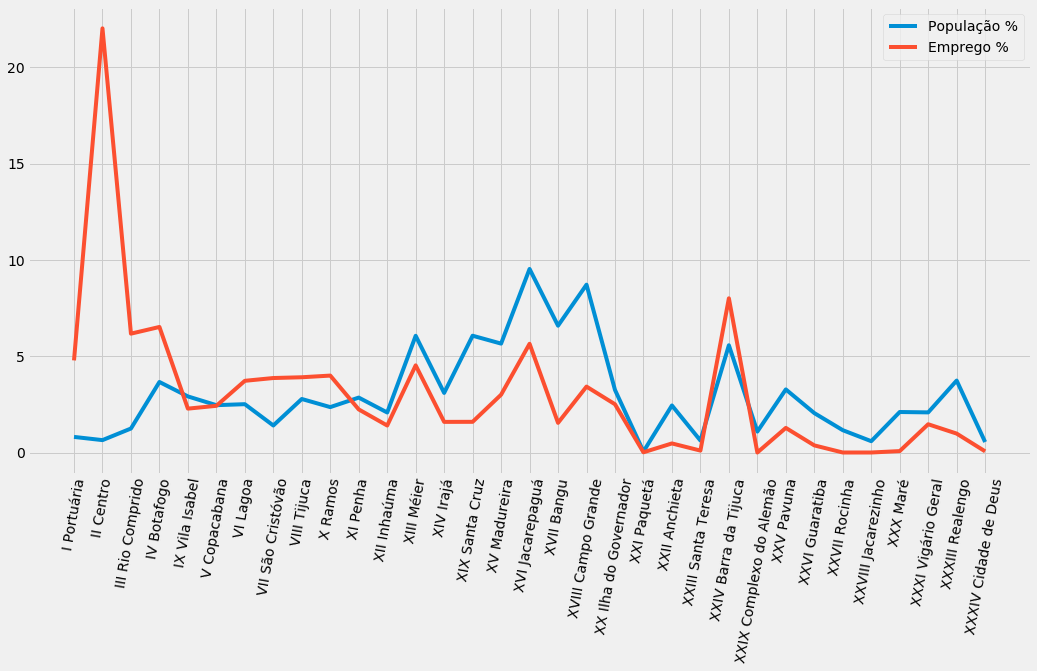

In [30]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
plt.figure(figsize=(16,8)) 
plt.xticks(rotation=80)

plt.plot(df_complete['RAS'], df_complete['Pop %'], label='População %')
plt.plot(df_complete['RAS'], df_complete['Emprego %'], label='Emprego %')

plt.legend()
plt.show()

Em uma primeira leitura dos dados a hipótese previamente discutida parece ser verdadeira!